In [1]:
# Listening to Live Data from Aave

# With the liquidity application we can currently perform the following functionality:

# 1. Gathering a list of active Aave users via listening to Borrow & Deposit Events.

# 2. Decode the configuration of a user to record which assets they hold.

# 3. Query Aave to find stable and variable debt as well as deposits for a user.

# The code below performs these three steps on the 10 recent Aave users.

from core.AaveLpService import AaveLpService
from utils.ContractService import ContractService
import os, pickle

def run():
    aave = AaveLpService()

    reserveContractService = ContractService(
        apiKey="CRSZ3RKR7QQY9IDYM6JEWXCQQBBRC8DGN6", 
        nodeAddress="https://mainnet.infura.io/v3/627dba05199b4a3780b76ef7a35b0d4d",
        contractAddress="0x057835Ad21a177dbdd3090bB1CAE03EaCF78Fc6d"
    )
    contract = reserveContractService.connect()

    aave.updateUserList()

    with open('core/userData.p', 'rb') as input:
        userData = pickle.load(input)
    
    numRecords = 0
    for user in userData['users']:
        userPositions = aave.getUserPositions(user)
        print(f'user address: {user}')
        print(f'asset data: {userPositions}')
        print(f'--------------------------------------------------------')
        numRecords += 1
        if (numRecords == 10): break
        
run()

user address: 0x2E771628e765C04a06252801177332D078A19A21
asset data: {'deposits': {'WETH': 9.010646681911357, 'UNI': 256.51552761272205, 'LINK': 37549.23451833557}, 'borrowed': {'USDC': 176185.526365}}
--------------------------------------------------------
user address: 0xdE606eedf9049a5EfECb5dFde5117c0239Afa532
asset data: {'deposits': {'WBTC': 2.61719098, 'WETH': 43.03260172945692, 'MKR': 8.8048129515511}, 'borrowed': {'USDC': 118632.095042}}
--------------------------------------------------------
user address: 0x7B77B7C809d764d1a729f000D737A7237ceE0c3D
asset data: {'deposits': {'WETH': 13.101673331280999}, 'borrowed': {'DAI': 18169.790157953936}}
--------------------------------------------------------
user address: 0x7eF216afdF22D1B336169a0C4bB7b5a531d1E528
asset data: {'deposits': {'WETH': 1741.8514781521108}, 'borrowed': {'USDC': 1668473.782476}}
--------------------------------------------------------
user address: 0x5c072afDC73BCb793d8FB9945fa6328591F7Bf5b
asset data: {'depo

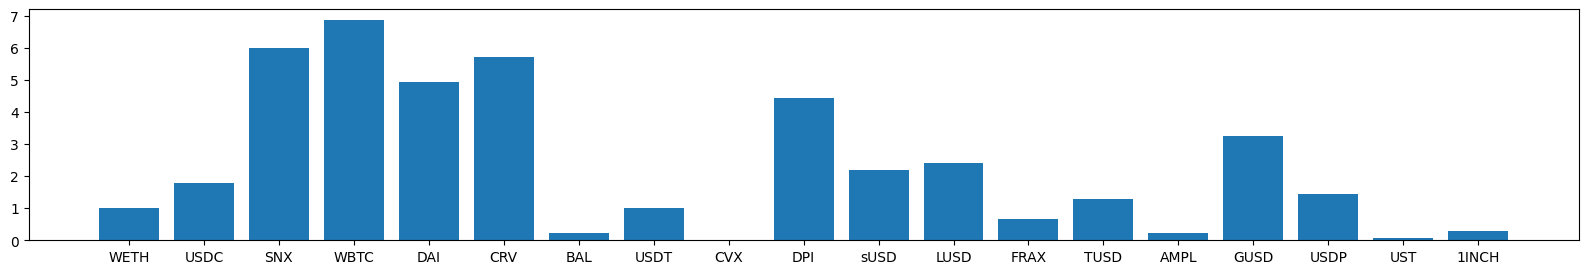

In [1]:
# Displaying aggregating long-short ratios on a bar chart
# This data is from the past week of transactions on Aave,
# and thus has quite a bit of skew.

from matplotlib import pyplot as plt
from core.AaveLpService import AaveLpService
import math

aave = AaveLpService()
longShortRatios = aave.getFilteredLongShortRatios()

x = [asset for asset in longShortRatios if not isinstance(longShortRatios[asset], str)]
 
y = [longShortRatios[asset] for asset in longShortRatios if not isinstance(longShortRatios[asset], str)]
 
plt.figure(figsize=(20, 3))
plt.bar(x, y)
 
plt.show()

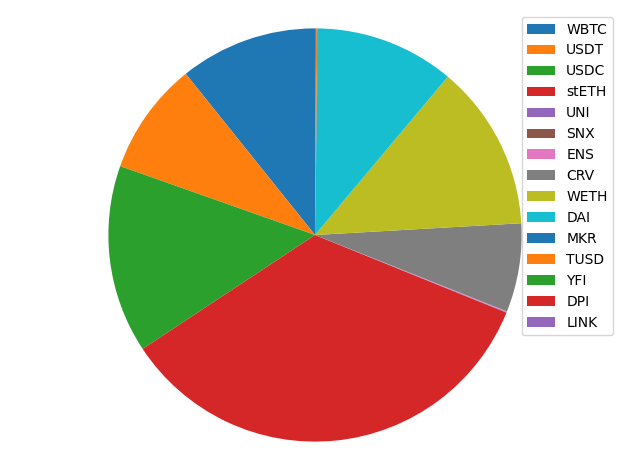

In [8]:
# Displaying asset distribution of the top 25 wallets
# that had a transaction on Aave in the past week.
# Note that all values are in ETH.

from matplotlib import pyplot as plt
from core.AaveLpService import AaveLpService
import math

aave = AaveLpService()
assetDistribution = aave.getTop25WalletDistribution()

labels = [asset for asset in assetDistribution]
 
sizes = [int(assetDistribution[asset]) for asset in assetDistribution]

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
 
plt.axis('equal')
plt.tight_layout()
plt.show()